In [1]:
import mnist_loader

training_data, validation_data, test_data = mnist_loader.load_data_wrapper()

In [2]:
len(training_data)



50000

In [3]:
training_data[0][0].shape

(784, 1)

In [4]:
len(training_data[1][0])



784

In [5]:
import matplotlib as plt
import matplotlib.pyplot as plt
from scipy.ndimage.filters import maximum_filter
import numpy as np
from scipy import signal
#from skimage.measure import block_reduce


In [6]:
x =training_data[0][0].reshape((28,28)) 

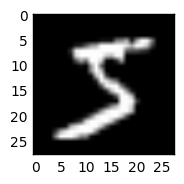

In [7]:
plt.subplot(221)
plt.imshow(x, cmap = plt.get_cmap('gray'))
plt.show()

In [8]:
new_training_data = [trainingdata[0].reshape((28,28)) for trainingdata in training_data]

In [9]:
new_training_data[0].shape


(28, 28)

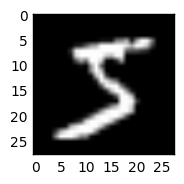

In [10]:
plt.subplot(221)
plt.imshow(new_training_data[0], cmap = plt.get_cmap('gray'))
plt.show()

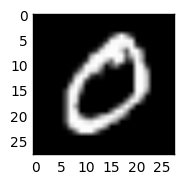

In [11]:
plt.subplot(221)
plt.imshow(new_training_data[1], cmap = plt.get_cmap('gray'))
plt.show()

In [14]:
import numpy as np
a = [[1, 2], [3, 4]]
np.lib.pad(a, 2, padwithzeros)

array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 1, 2, 0, 0],
       [0, 0, 3, 4, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]])

In [13]:
def padwithzeros(vector, pad_width, iaxis, kwargs):
    vector[:pad_width[0]] = 0
    vector[-pad_width[1]:] = 0
    return vector

In [15]:
padded_training_data = [np.lib.pad(traindata, 2, padwithzeros) for traindata in new_training_data]

In [18]:
padded_training_data[0].shape

(32, 32)

In [19]:
processed_training_data = [[padded_training, train_data[1]]for  padded_training,train_data in zip(padded_training_data,training_data)]

In [20]:
processed_training_data[49000][0].shape

(32, 32)

In [21]:
new_validation_data = [validdata[0].reshape((28,28)) for validdata in validation_data]
padded_validation_data = [np.lib.pad(valdata, 2, padwithzeros) for valdata in new_validation_data]


In [23]:

#You should also process validation data so that it can be used a 32*32 input
processed_validation_data = [[padded_valid, valid_data[1]]for  padded_valid,valid_data in zip(padded_validation_data,validation_data)]

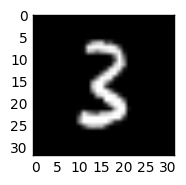

In [24]:
plt.subplot(221)
plt.imshow(processed_validation_data[0][0], cmap = plt.get_cmap('gray'))
plt.show()

In [25]:
processed_validation_data[0][1]

3

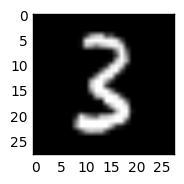

In [26]:
plt.subplot(221)
plt.imshow(new_validation_data[0], cmap = plt.get_cmap('gray'))
plt.show()

In [27]:
validation_data[0][1]

3

In [28]:
processed_validation_data[0][1]

3

In [29]:
training_data[45500][1].argmax()

2

In [30]:
processed_training_data[45500][1].argmax()

2

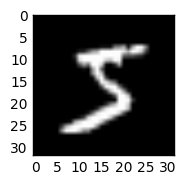

In [31]:
plt.subplot(221)
plt.imshow(processed_training_data[0][0], cmap = plt.get_cmap('gray'))
plt.show()

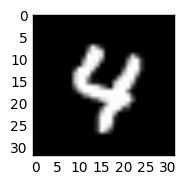

In [32]:
plt.subplot(221)
plt.imshow(padded_training_data[49000], cmap = plt.get_cmap('gray'))
plt.show()

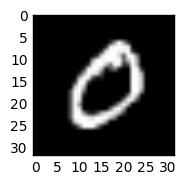

In [214]:
plt.subplot(221)
plt.imshow(processed_training_data[1][0], cmap = plt.get_cmap('gray'))
plt.show()

In [14]:
len(padded_training_data)

50000

In [15]:
len(padded_training_data[0])

32

In [16]:
padded_training_data[1]

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]], dtype=float32)

In [33]:
#Given an input 2-D and 3-D convolution list
#3-D because it is a list of 2-D convolution kernels
#Returns a convoluted 3-D tensor. Third dimension is the number of kernels
def conv2d(inp,conv):
    out = []
    for i in conv:
        out.append(signal.correlate(inp,i,mode ='valid'))
    return np.array(out)

In [34]:
#Given an input 3-D tensor and 4-D convloution list
#4-D because it is a list of 3-D convolution kernels
#Returns a convoluted 3-D tensor. Third dimension is the number of kernels
def conv3d(inp,conv):
    out =[]
    for i in conv:#5*5*6 16 times
        temp = []
        for j,k in zip(inp,i):#14*14 and 5*5
            temp.append(signal.correlate(j,k,mode='valid'))#10*10
        temp = np.array(temp)#(6,10,10)
        out.append(np.sum(temp,axis=0))#10*10 appends 16 times
    return np.array(out) #returns (16,10,10)

In [35]:
#Given an input 3-D previous layer input and 3-D tensor of gradients
#out puts the gradient for weights
#returns a 4d tensor of delta of weights
def conv3d_backprop_tensor_wt(inp,conv):
    out=[]
    for i in conv:
        temp = []
        for j in inp:
            temp.append(signal.correlate(j,i,mode ='valid'))
        temp = np.array(temp)
        out.append(temp)
    return np.array(out)

In [36]:
#Given an input 2-D previous layer input and 3-D tensor of gradients
#out puts the gradient for weights
#returns a 3d tensor of delta of weights
def conv2d_backprop_tensor_wt(inp,conv):
    out=[]
    for i in conv:
        out.append(signal.correlate(inp,i,mode ='valid'))
    return np.array(out)

In [37]:
#Given an input 3-D delta input and 4-D tensor of weights
#out puts the delta of the precious layer
#returns a 3d tensor of delta
#Right now the implementation doesn't use 
#np.repeat to make a tensor of delta of the previous layer
def conv3d_backprop_tensor_del(delt,wts):
    out = []
    for i,j in zip(delt,wts):
        rot_i = np.rot90(i,2)#10*10
        temp =[]
        for k in j:#k is 5*5
            #temp.append(signal.convolve(padded_i,np.rot90(k,2),'valid'))
            temp.append(signal.correlate(k,rot_i))#Rotated by 180  #size 14*14
        temp = np.array(temp) #14*14*6
        out.append(temp)
    out = np.array(out)#16 of 14*14*6 so (16,6,14,14)
    return out.sum(axis=0) #back to (6,14,14)           
    

In [50]:
def ReLU(x):
    return x*(x > 0)

def ReLU_prime(x):
    return 1*(x > 0)

def tanh(z):
    return np.tanh(z)

def tanh_prime(z):
    return 1.0 - (np.tanh(z))**2.0    

def softmax(x):
    shiftx = x - np.max(x)
    exps = np.exp(shiftx)
    return exps / np.sum(exps)

def softmax_prime(x):
    a =  softmax(x) 
    return a*(1-a)

In [39]:
#Given a 2-d array it does max-pool and reduces the input into half 
def maxpool2d(inp):
    rows_dims = inp.shape[0]/2
    cols_dims = inp.shape[1]/2
    backprop_filter = np.zeros((inp.shape[0], inp.shape[1]))
    maxpooled = np.zeros((rows_dims, cols_dims))
    
    maxpooled_row = 0
    for rows in range(0,inp.shape[0]-1,2):
        row_offset = rows +1
        maxpooled_col = 0
        for cols in range(0,inp.shape[1]-1,2):
            col_offset = cols +1
            
            maxpooled[maxpooled_row][maxpooled_col] = inp[np.ix_([rows,row_offset],[cols,col_offset])].max()
            max_index = inp[np.ix_([rows,row_offset],[cols,col_offset])].argmax()
            backprop_filter[rows + max_index/2][cols + max_index%2] = 1
            maxpooled_col = maxpooled_col + 1
        
        maxpooled_row = maxpooled_row + 1
        
    return maxpooled,backprop_filter

In [40]:
#Give it a tensor, gives back tensor after maxpooling
#Also gives you a filter storing the indices where the maximum existed
def maxpool3d(inp_tensor):
    out_shape = inp_tensor.shape[1]/2
    pooled_out=np.empty((inp_tensor.shape[0],out_shape,out_shape))
    backprop_tensor = np.empty((inp_tensor.shape))
    i=0
    for inp in inp_tensor:
        pooled_out[i],backprop_tensor[i] = maxpool2d(inp)
        i=i+1
    return pooled_out,backprop_tensor

In [41]:
#flatten a tensor into a vector
def flat(inp_tensor):
    return inp_tensor.flatten()

In [42]:
#takes the spatial dimensions of the tensor required and gives us the tensor from a vector
def maketensor(inp_vec,x,y,z):
    return inp_vec.reshape((z,y,x))

In [43]:
#Give it a tensor, gives back tensor after maxpooling
def maxpool3d_feedfwd(inp_tensor):
    N,h,w = inp_tensor.shape
    return inp_tensor.reshape(N, h / 2, 2, w / 2, 2).max(axis=(2, 4))

In [68]:
import random
#Construction of the LeNet5 network
class Network(object):
    
    def __init__(self, sizes):
        #Initializing the weights and biases for all the layers in the LeNet5
        #You have a choice to choose the kernel size and number of kernels
        #The depth is constant and follows LeNet5
        self.num_layers = len(sizes)
        self.weights =[]
        conv1 = np.random.randn(sizes[0][0],sizes[0][1],sizes[0][2])*5/(1*np.sqrt(sizes[0][0]*sizes[0][1]*sizes[0][2]))
        self.weights.append(conv1)
        conv2 =[]
        for i in range (sizes[1][0]):
            conv2.append(np.random.randn(sizes[1][1],sizes[1][2],sizes[1][3])*5/(1*np.sqrt(sizes[1][1]*sizes[1][2]*sizes[1][3])))
        conv2 = np.array(conv2)
        self.weights.append(conv2)
        wts = [np.random.randn(y, x)*5/(1*np.sqrt(x*y)) for x, y in zip(sizes[2:][:-1], sizes[2:][1:])]
        #wts = [np.random.randn(400, 120)*5/(1*np.sqrt(400*120)), np.random.randn(120, 84)*5/(1*np.sqrt(120*84)), np.random.randn(84, 10)*5/(1*np.sqrt(84*10))]
        for wt in wts:
            self.weights.append(wt)
#         self.biases = []
#         self.biases.append(np.random.randn(sizes[0][0], 1))
#         self.biases.append(np.random.randn(sizes[1][1],sizes[1][0]))
        
#         biases = [np.random.randn(y, 1) for y in sizes[3:][0:]]
#         for bias in biases:
#             self.biases.append(bias)
        self.sizes = sizes
        
#################################################################
    #Feedforward step of the LeNet5
    #Return the prediction given an input image of size 32*32 
    def feedforward(self,a):
        #conv1_out = np.empty((self.sizes[0][0],a.shape[0]-self.sizes[0][1],a.shape[1]-self.sizes[0][2]) #Use this if you are using different convolutions
                                                    #than specified in the LeNet5 paper
        
        #This is for standard LeNet5
        #Using this just to reduce the number of flops
        
        conv1_out = conv2d(a,self.weights[0]) #First convolution layer
        conv1_out = tanh(conv1_out)
        max1_out = maxpool3d_feedfwd(conv1_out) #First maxpool layer
        conv2_out = conv3d(max1_out, self.weights[1]) #Second convolution layer
        conv2_out = tanh(conv2_out)
        max2_out = maxpool3d_feedfwd(conv2_out)
        
        #We have a 16 * ( 5*5) tensor after all these operations
        #flatten it and use it as input to the mlp
        
        mlp_inp = flat(max2_out)
        mlp_inp = np.array([mlp_inp])
        mlp = mlp_inp.T
        
        fc1 = mlp
        fc2 = np.dot(self.weights[2], fc1)
        fc2_act = tanh(fc2)
        fc3 = np.dot(self.weights[3], fc2_act)
        fc3_act = tanh(fc3)
        fc4 = np.dot(self.weights[4], fc3_act)
        y_pred = softmax(fc4) 
        
        return y_pred
    
    def SGD(self, training_data, epochs, mini_batch_size, eta,
            test_data=None):
        """Train the neural network using mini-batch stochastic
        gradient descent.  The ``training_data`` is a list of tuples
        ``(x, y)`` representing the training inputs and the desired
        outputs.  The other non-optional parameters are
        self-explanatory.  If ``test_data`` is provided then the
        network will be evaluated against the test data after each
        epoch, and partial progress printed out.  This is useful for
        tracking progress, but slows things down substantially."""
        plot_accur=[]
        plot_itr=[]
        rms_w = [np.zeros(w.shape) for w in self.weights]
        if test_data: n_test = len(test_data)
        n = len(training_data)
        counter_min_batch = 0
        for j in xrange(epochs):
            random.shuffle(training_data)
            mini_batches = [
                training_data[k:k+mini_batch_size]
                for k in xrange(0, n, mini_batch_size)]
            
            for mini_batch in mini_batches:
                self.update_mini_batch(mini_batch, eta,rms_w)
                if test_data:
                    evaluation = self.evaluate(test_data)
                    #plot_accur.append(100-(evaluation/100))
                    plot_accur.append(evaluation/2)
                    plot_itr.append(counter_min_batch)
                    print "Epoch {0}: {1} / {2}".format(
                        j, evaluation , n_test)
                    with open('data_valid_train16.csv', 'ab+') as csvfile:
                        titlewriter = csv.writer(csvfile, delimiter=',')
                        titlewriter.writerow([counter_min_batch,evaluation,100])
                else:
                    print "Epoch {0} complete".format(j)
                counter_min_batch = counter_min_batch + 1
    
        #plot the accuracies
        a = plt.plot(np.asarray(plot_itr),np.asarray(plot_accur), label = 'Accuracy')
        plt.xlabel('Number of iterations')
        plt.ylabel('Accuracy for training examples ')
        plt.show()
    
    def update_mini_batch(self, mini_batch, eta,ar_w):
        """Update the network's weights and biases by applying
        gradient descent using backpropagation to a single mini batch.
        The ``mini_batch`` is a list of tuples ``(x, y)``, and ``eta``
        is the learning rate."""
        epi = 1e-8
        #nabla_b = [np.zeros(b.shape) for b in self.biases]
        nabla_w = [np.zeros(w.shape) for w in self.weights]
        for x, y in mini_batch:
            #Backprop is called and the weight is changed for all the kernels
            #Important to note that
            #delta_nabla_b, delta_nabla_w = self.backprop(x, y)
            
            delta_nabla_w = self.backprop(x, y)
            #nabla_b = [nb+dnb for nb, dnb in zip(nabla_b, delta_nabla_b)]
            nabla_w = [nw+dnw for nw, dnw in zip(nabla_w, delta_nabla_w)]
        
        ar_w = [(0.1*nw*nw)+ 0.9*aw for nw,aw in zip(nabla_w,ar_w)]
        self.weights = [w-(eta/len(mini_batch))*np.divide(nw,np.sqrt(aw+epi))
                            for w, nw,aw in zip(self.weights, nabla_w ,ar_w)]
#         self.biases = [b-(eta/len(mini_batch))*nb
#                        for b, nb in zip(self.biases, nabla_b)]
      
    def backprop(self, x, y):
        """Return a tuple ``(nabla_b, nabla_w)`` representing the
        gradient for the cost function C_x.  ``nabla_b`` and
        ``nabla_w`` are layer-by-layer lists of numpy arrays, similar
        to ``self.biases`` and ``self.weights``."""
        
        #nabla_b = [np.zeros(b.shape) for b in self.biases]
        del_w = [np.zeros(w.shape) for w in self.weights]
        
        max1_del = np.empty((6,28,28))
        max2_del = np.empty((16,10,10))
        
        conv1_out = conv2d(x,self.weights[0]) #First convolution layer
        conv1_out_act = tanh(conv1_out)
        max1_out,max1_del = maxpool3d(conv1_out_act) #First maxpool layer
        conv2_out = conv3d(max1_out, self.weights[1]) #Second convolution layer
        conv2_out_act = tanh(conv2_out)
        max2_out, max2_del = maxpool3d(conv2_out_act)
        
        #We have a 16 * ( 5*5) tensor after all these operations
        #flatten it and use it as input to the mlp
        
        mlp_inp = flat(max2_out)
        mlp_inp = np.array([mlp_inp])
        mlp = mlp_inp.T
        #Backprop for mlp
        
        fc1 = mlp
        fc2 = np.dot(self.weights[2], fc1)
        fc2_act = tanh(fc2)
        fc3 = np.dot(self.weights[3], fc2_act)
        fc3_act = tanh(fc3)
        fc4 = np.dot(self.weights[4], fc3_act)
        y_pred = softmax(fc4)      
                
        #deltas = []
        delta = (y_pred - y) * softmax_prime(fc4) #Cross entropy loss function with softmax
        #deltas.insert(0,delta)
        #nabla_b[-1] = delta
        del_w[-1] = np.dot(delta, fc3_act.transpose())
        
        delta = np.dot(self.weights[-1].transpose(), delta) * tanh_prime(fc3)
        del_w[-2] = np.dot(delta, fc2_act.transpose())
        
        delta = np.dot(self.weights[-2].transpose(), delta) * tanh_prime(fc2)
        del_w[-3] = np.dot(delta, fc1.transpose())
        
        delta = np.dot(self.weights[-3].transpose(), delta) #delta of 400. The result of maxpooling
        
        #this delta is (400,1)
        #gotta reshape this for maxpool
        delta =delta.reshape((16,5,5))
        
        temp_delta = []
        for kernel in delta:
            kernel = np.repeat(kernel,2,axis=1)
            kernel = np.repeat(kernel,2,axis=0)
            temp_delta.append(kernel)
        temp_delta = np.array(temp_delta)
        
        #Now we use the filter max2_del to send back the gradient
        #only through the maximum of the 2-D matrices
        delta = max2_del * temp_delta #(16,10,10)
        delta =  delta * tanh_prime(conv2_out) 
        #deltas.insert(0,delta)
        del_w[-4] = conv3d_backprop_tensor_wt(max1_out,delta)
        
        delta = conv3d_backprop_tensor_del(delta,self.weights[1]) #(6,14,14)
        
        temp_del = []
        for kernel in delta:
            kernel = np.repeat(kernel,2,axis=1)
            kernel = np.repeat(kernel,2,axis=0)
            temp_del.append(kernel)
        temp_del = np.array(temp_del)
        
        #Now we use the filter max1_del to send back the gradient
        #only through the maximum of the 2-D matrices
        delta = max1_del * temp_del #(6,28,28)
        delta = delta * tanh_prime(conv1_out)
        #deltas.insert(0,delta)
        
        del_w[-5] = conv2d_backprop_tensor_wt(x,delta)
        
        #return (nabla_b, nabla_w)
        return del_w
             
    def evaluate(self, test_data):
        """Return the number of test inputs for which the neural
        network outputs the correct result. Note that the neural
        network's output is assumed to be the index of whichever
        neuron in the final layer has the highest activation."""
        test_results = [(np.argmax(self.feedforward(x)),np.argmax(y))
                        for (x, y) in test_data]
        return sum(int(x == y) for (x, y) in test_results)
    
    def trainloss(self,x,y):
        return cost_fn(softmax(self.feedforward(x)),y)
        

In [69]:
net = Network(sizes)

In [45]:
sizes =[[6, 5, 5], [16, 6, 5, 5], 400, 120, 84, 10]

In [48]:
net.weights[1].shape

(16, 6, 5, 5)

In [873]:
mlp_inp = np.array([mlp_inp])
mlp = mlp_inp.T

In [876]:
mlp.shape

(400, 1)

In [834]:
#Grad checkturn


In [49]:
def softmax(x):
    soft_max = np.exp(x -np.max(x))
    return (soft_max /soft_max.sum())

In [1073]:
cost= cost_fn(softmax(net.feedforward(trainData)),trainLabel)

In [1102]:
import csv

In [1040]:
def cost_fn(a, y):
    return np.sum(np.nan_to_num(-y*np.log(a)))

In [974]:
processed_validation_data[0][1]

3

In [1087]:
dW = net.backprop(trainData,trainLabel)

In [1005]:
dW[3]

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.01239166,  0.00681797, ...,  0.02249263,
         0.        ,  0.01995166],
       ..., 
       [ 0.        ,  0.00801636,  0.00441065, ...,  0.01455083,
         0.        ,  0.01290704],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.00655184,  0.00360486, ...,  0.01189252,
         0.        ,  0.01054904]])

In [1006]:
y[260:270]

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

In [917]:
z[260:270]

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

In [1088]:
dW0 = dW[2].flatten()


In [1089]:
dW0.shape

(48000,)

In [1027]:
j

3

In [1090]:
num = 500
# num = len(dW0)
j = 2
x=[]
for i in range(num):
    x.append(i)
y= []
z= []

In [1091]:
epsi = 1e-04
W0 = net.weights[j].flatten()
# W0 = net.Biases[j].flatten()
temp = W0
# for i in range(len(temp)):
for i in range(num):

    base = temp[i]
    base += epsi
    W0[i] = base
    net.weights[j] = W0.reshape(net.weights[j].shape)
#     net.Biases[j] = W0.reshape(net.Biases[j].shape)
    
    one = cost_fn(softmax(net.feedforward(trainData)),trainLabel)
    
    base = temp[i]
    base -= epsi
    W0[i] = base
    net.weights[j] = W0.reshape(net.weights[j].shape)
#     net.Biases[j] = W0.reshape(net.Biases[j].shape)
    
    two = cost_fn(softmax(net.feedforward(trainData)),trainLabel)

    W0[i] = temp[i]
    
    val1 = dW0[i]
    val2 = (one-two)/(2.0*epsi)
    y.append(val1)
    z.append(val2)  


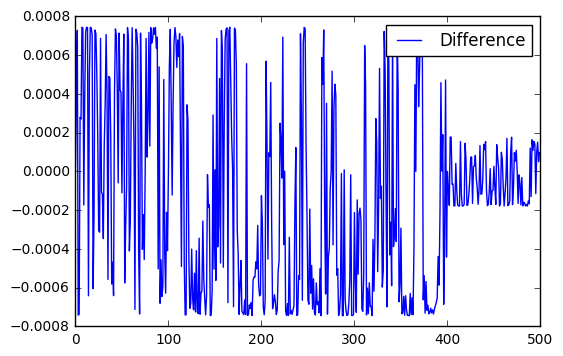

In [1092]:
# In[6]:

a = plt.plot(x,(np.asarray(y)-np.asarray(z)), label = 'Difference')

#b = plt.plot(x,np.asarray(z) , label = 'Ideal')
#c = plt.plot(x,np.asarray(y), label = 'Actual')
plt.legend()
plt.show()



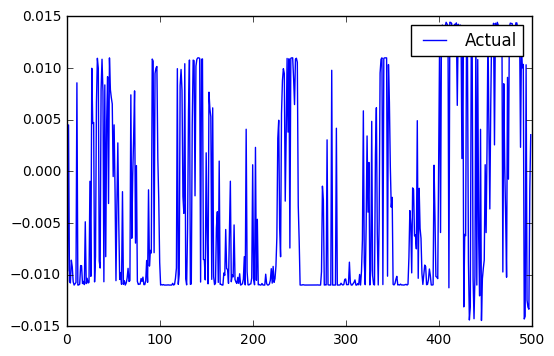

In [1080]:
#b = plt.plot(x,np.asarray(z) , label = 'Ideal')
c = plt.plot(x,np.asarray(y), label = 'Actual')
plt.legend()
plt.show()

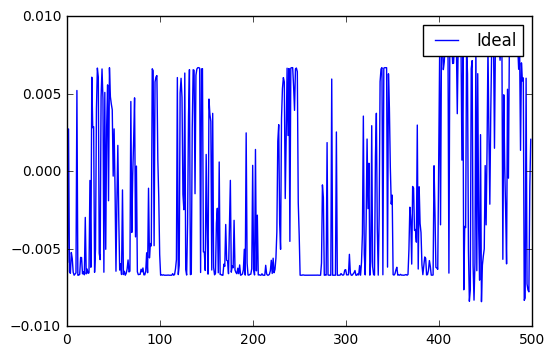

In [1081]:
b = plt.plot(x,np.asarray(z) , label = 'Ideal')
#c = plt.plot(x,np.asarray(y), label = 'Actual')
plt.legend()
plt.show()

Epoch 0: 9 / 100
Epoch 0: 20 / 100
Epoch 0: 39 / 100
Epoch 0: 26 / 100
Epoch 0: 34 / 100
Epoch 0: 51 / 100
Epoch 0: 30 / 100
Epoch 0: 31 / 100
Epoch 0: 53 / 100
Epoch 0: 52 / 100
Epoch 0: 72 / 100
Epoch 0: 63 / 100
Epoch 0: 64 / 100
Epoch 0: 76 / 100
Epoch 0: 71 / 100
Epoch 0: 67 / 100
Epoch 0: 76 / 100
Epoch 0: 66 / 100
Epoch 0: 70 / 100
Epoch 0: 67 / 100
Epoch 0: 75 / 100
Epoch 0: 74 / 100
Epoch 0: 78 / 100
Epoch 0: 76 / 100
Epoch 0: 75 / 100
Epoch 0: 77 / 100
Epoch 0: 78 / 100
Epoch 0: 81 / 100
Epoch 0: 76 / 100
Epoch 0: 80 / 100
Epoch 0: 70 / 100
Epoch 0: 85 / 100
Epoch 0: 75 / 100
Epoch 0: 78 / 100
Epoch 0: 80 / 100
Epoch 0: 69 / 100
Epoch 0: 80 / 100
Epoch 0: 76 / 100
Epoch 0: 87 / 100
Epoch 0: 79 / 100
Epoch 0: 79 / 100
Epoch 0: 85 / 100
Epoch 0: 81 / 100
Epoch 0: 89 / 100
Epoch 0: 89 / 100
Epoch 0: 79 / 100
Epoch 0: 79 / 100
Epoch 0: 85 / 100
Epoch 0: 83 / 100
Epoch 0: 86 / 100
Epoch 0: 82 / 100
Epoch 0: 85 / 100
Epoch 0: 89 / 100
Epoch 0: 89 / 100
Epoch 0: 87 / 100
Epoch 0: 84

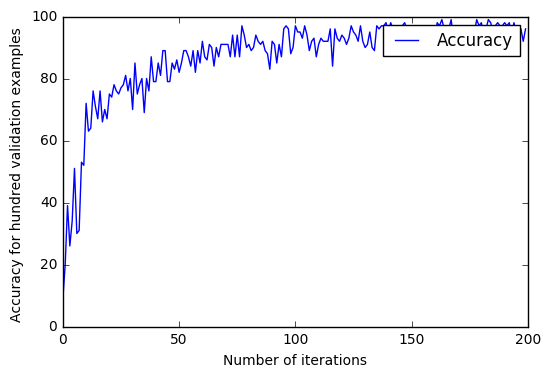

In [1120]:
net.SGD(processed_training_data[:6400], 2, 64, 0.1, test_data=processed_validation_data[:100])        


c = plt.plot(x,np.asarray(y), label = 'Actual')
plt.legend()
plt.show()

Epoch 0: 66 / 300
Epoch 0: 48 / 300
Epoch 0: 73 / 300
Epoch 0: 77 / 300
Epoch 0: 84 / 300
Epoch 0: 125 / 300
Epoch 0: 109 / 300
Epoch 0: 182 / 300
Epoch 0: 178 / 300
Epoch 0: 170 / 300
Epoch 0: 197 / 300
Epoch 0: 184 / 300
Epoch 0: 212 / 300
Epoch 0: 210 / 300
Epoch 0: 231 / 300
Epoch 0: 210 / 300
Epoch 0: 247 / 300
Epoch 0: 227 / 300
Epoch 0: 221 / 300
Epoch 0: 245 / 300
Epoch 0: 228 / 300
Epoch 0: 241 / 300
Epoch 0: 252 / 300
Epoch 0: 240 / 300
Epoch 0: 247 / 300
Epoch 0: 245 / 300
Epoch 0: 248 / 300
Epoch 0: 248 / 300
Epoch 0: 246 / 300
Epoch 0: 262 / 300
Epoch 0: 252 / 300
Epoch 0: 257 / 300
Epoch 0: 248 / 300
Epoch 0: 257 / 300
Epoch 0: 253 / 300
Epoch 0: 264 / 300
Epoch 0: 256 / 300
Epoch 0: 260 / 300
Epoch 0: 250 / 300
Epoch 0: 260 / 300
Epoch 0: 263 / 300
Epoch 0: 265 / 300
Epoch 0: 259 / 300
Epoch 0: 266 / 300
Epoch 0: 263 / 300
Epoch 0: 269 / 300
Epoch 0: 262 / 300
Epoch 0: 270 / 300
Epoch 0: 266 / 300
Epoch 0: 276 / 300
Epoch 0: 269 / 300
Epoch 0: 277 / 300
Epoch 0: 264 / 30

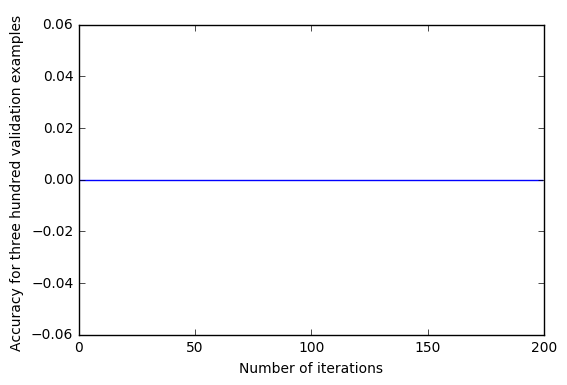

Epoch 0: 44 / 300
Epoch 0: 54 / 300
Epoch 0: 52 / 300
Epoch 0: 72 / 300
Epoch 0: 60 / 300
Epoch 0: 29 / 300
Epoch 0: 41 / 300
Epoch 0: 83 / 300
Epoch 0: 72 / 300
Epoch 0: 51 / 300
Epoch 0: 119 / 300
Epoch 0: 128 / 300
Epoch 0: 86 / 300
Epoch 0: 98 / 300
Epoch 0: 155 / 300
Epoch 0: 162 / 300
Epoch 0: 179 / 300
Epoch 0: 132 / 300
Epoch 0: 192 / 300
Epoch 0: 150 / 300
Epoch 0: 198 / 300
Epoch 0: 201 / 300
Epoch 0: 215 / 300
Epoch 0: 183 / 300
Epoch 0: 185 / 300
Epoch 0: 207 / 300
Epoch 0: 220 / 300
Epoch 0: 188 / 300
Epoch 0: 213 / 300
Epoch 0: 237 / 300
Epoch 0: 199 / 300
Epoch 0: 216 / 300
Epoch 0: 211 / 300
Epoch 0: 212 / 300
Epoch 0: 235 / 300
Epoch 0: 223 / 300
Epoch 0: 230 / 300
Epoch 0: 212 / 300
Epoch 0: 237 / 300
Epoch 0: 233 / 300
Epoch 0: 230 / 300
Epoch 0: 240 / 300
Epoch 0: 239 / 300
Epoch 0: 227 / 300
Epoch 0: 220 / 300
Epoch 0: 227 / 300
Epoch 0: 233 / 300
Epoch 0: 237 / 300
Epoch 0: 233 / 300
Epoch 0: 243 / 300
Epoch 0: 238 / 300
Epoch 0: 246 / 300
Epoch 0: 236 / 300
Epoch

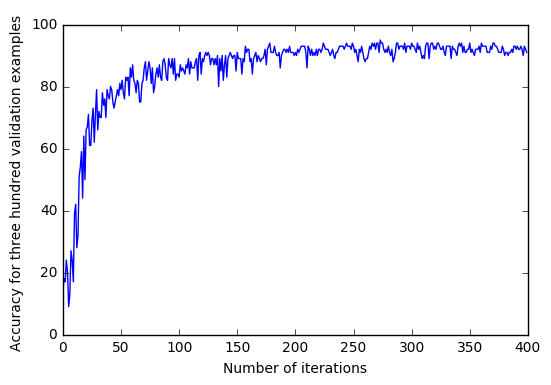

In [53]:
net.SGD(processed_training_data[:6400], 2, 32, 0.1, test_data=processed_validation_data[:300])        


In [52]:
import csv

Epoch 0: 26 / 200
Epoch 0: 34 / 200
Epoch 0: 47 / 200
Epoch 0: 21 / 200
Epoch 0: 23 / 200
Epoch 0: 57 / 200
Epoch 0: 55 / 200
Epoch 0: 68 / 200
Epoch 0: 25 / 200
Epoch 0: 79 / 200
Epoch 0: 65 / 200
Epoch 0: 47 / 200
Epoch 0: 110 / 200
Epoch 0: 97 / 200
Epoch 0: 111 / 200
Epoch 0: 116 / 200
Epoch 0: 101 / 200
Epoch 0: 128 / 200
Epoch 0: 120 / 200
Epoch 0: 136 / 200
Epoch 0: 123 / 200
Epoch 0: 133 / 200
Epoch 0: 112 / 200
Epoch 0: 120 / 200
Epoch 0: 137 / 200
Epoch 0: 142 / 200
Epoch 0: 143 / 200
Epoch 0: 138 / 200
Epoch 0: 154 / 200
Epoch 0: 155 / 200
Epoch 0: 144 / 200
Epoch 0: 149 / 200
Epoch 0: 154 / 200
Epoch 0: 160 / 200
Epoch 0: 161 / 200
Epoch 0: 141 / 200
Epoch 0: 166 / 200
Epoch 0: 168 / 200
Epoch 0: 133 / 200
Epoch 0: 167 / 200
Epoch 0: 167 / 200
Epoch 0: 153 / 200
Epoch 0: 150 / 200
Epoch 0: 168 / 200
Epoch 0: 165 / 200
Epoch 0: 160 / 200
Epoch 0: 157 / 200
Epoch 0: 158 / 200
Epoch 0: 172 / 200
Epoch 0: 159 / 200
Epoch 0: 167 / 200
Epoch 0: 154 / 200
Epoch 0: 171 / 200
Epoch 

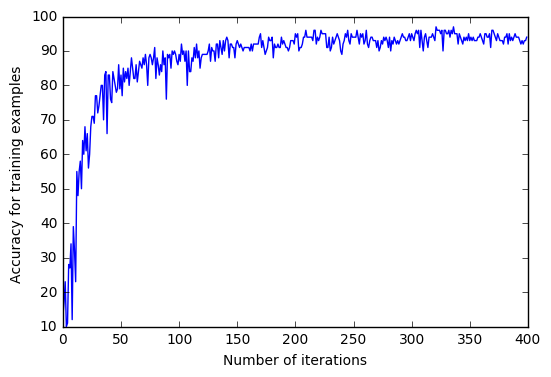

In [66]:
#training error min batch 32 
net.SGD(processed_training_data[:6400], 2, 32, 0.1, test_data=processed_training_data[:200])        

In [70]:
#training error min batch 16
net.SGD(processed_training_data[:6400], 2, 16, 0.1, test_data=processed_training_data[:200])        

Epoch 0: 21 / 200
Epoch 0: 26 / 200
Epoch 0: 15 / 200
Epoch 0: 21 / 200
Epoch 0: 19 / 200
Epoch 0: 22 / 200
Epoch 0: 23 / 200
Epoch 0: 13 / 200
Epoch 0: 21 / 200
Epoch 0: 26 / 200
Epoch 0: 21 / 200
Epoch 0: 15 / 200
Epoch 0: 26 / 200
Epoch 0: 20 / 200
Epoch 0: 15 / 200
Epoch 0: 21 / 200
Epoch 0: 21 / 200
Epoch 0: 23 / 200
Epoch 0: 15 / 200
Epoch 0: 21 / 200
Epoch 0: 21 / 200
Epoch 0: 23 / 200
Epoch 0: 15 / 200
Epoch 0: 26 / 200
Epoch 0: 13 / 200
Epoch 0: 19 / 200
Epoch 0: 26 / 200
Epoch 0: 21 / 200
Epoch 0: 21 / 200
Epoch 0: 21 / 200
Epoch 0: 21 / 200
Epoch 0: 21 / 200
Epoch 0: 21 / 200
Epoch 0: 21 / 200
Epoch 0: 21 / 200
Epoch 0: 21 / 200
Epoch 0: 13 / 200
Epoch 0: 26 / 200
Epoch 0: 21 / 200
Epoch 0: 21 / 200
Epoch 0: 21 / 200
Epoch 0: 19 / 200
Epoch 0: 26 / 200
Epoch 0: 20 / 200
Epoch 0: 21 / 200
Epoch 0: 21 / 200
Epoch 0: 23 / 200
Epoch 0: 21 / 200
Epoch 0: 21 / 200
Epoch 0: 21 / 200
Epoch 0: 26 / 200
Epoch 0: 20 / 200
Epoch 0: 13 / 200
Epoch 0: 19 / 200
Epoch 0: 15 / 200
Epoch 0: 2

KeyboardInterrupt: 

In [ ]:
#training error min batch 64, 128 done through terminal

In [480]:
max2_out.shape

(16, 5, 5)

In [936]:
#training error min batch 128
net.SGD(processed_training_data[:6400], 2, 128, 0.1, test_data=processed_training_data[:200])        

Epoch 0: 21 / 300
Epoch 1: 21 / 300
Epoch 2: 21 / 300


KeyboardInterrupt: 

[[6, 5, 5], [16, 6, 5, 5], 400, 120, 84, 10]

In [452]:
conv1_out = conv2d(processed_training_data[0][0],weights[0])

In [453]:
conv1_out.shape

(6, 28, 28)

In [425]:
net.weights[0].shape

(6, 5, 5)

In [459]:
nabla_w = [np.zeros(w.shape) for w in weights]

In [462]:
nabla_w[0].shape

(6, 5, 5)

In [43]:
#Roughwork
conv1_out = np.empty((6,28,28))
sizes = [[6,5,5],[16,6,5,5],400,120,84,10]
conv1 = np.random.randn(sizes[0][0],sizes[0][1],sizes[0][2])
conv1_out=conv2d(padded_training_data[0],conv1)

In [56]:
conv2 =[]
for i in range (sizes[1][0]):
    conv2.append(np.random.randn(sizes[1][1],sizes[1][2],sizes[1][3]))
conv2 = np.array(conv2)

In [57]:
conv2.shape

(16, 6, 5, 5)

In [48]:
padded_training_data[0]

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]], dtype=float32)

In [49]:
padded_training_data[0][4]

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.], dtype=float32)

In [50]:
padded_training_data[0][5]

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.], dtype=float32)

In [51]:
conv1_out[0][0][0]

0.0

In [63]:
max2_out = np.empty((16,5,5))

In [53]:
max1_out = maxpool3d_feedfwd(conv1_out)

In [60]:
#Given an int 3-D tensor and 4-D convloution list
#4-D because it is a list of 3-D convolution kernels
#Returns a convoluted 3-D tensor. Third dimension is the number of kernels
def conv3d(inp,conv):
    depth = conv.shape[1]
    A=[]
    for f in range(conv.shape[0]):
        conv_out = np.sum([signal.convolve2d(inp[i],np.rot90(np.rot90(conv[f][i])),mode='valid') for i in range(depth)], axis=0)
        A.append(conv_out)
    out = np.array(A)
    return out

In [309]:
conv2_out = np.empty((16,10,10))
max2_out = np.empty((16,5,5))

In [70]:
conv1.shape

(6, 5, 5)

In [69]:
conv2.shape

(16, 6, 5, 5)

In [64]:
max2_out = maxpool3d_feedfwd(conv2_out)


In [81]:
mlp_inp= flatten(max2_out)

In [66]:
max2_out.shape

(400,)

In [67]:
wts = [np.random.randn(y, x) for x, y in zip(sizes[2:][:-1], sizes[2:][1:])]

In [72]:
weights = []
weights.append(conv1)

In [73]:
weights.append(conv2)
for wt in wts:
    weights.append(wt)

In [74]:
weights [3].shape

(84, 120)

In [75]:
p = np.empty((120,1))

In [76]:
p=np.dot(weights[2],max2_out)

In [224]:
nabla_w = [np.zeros(w.shape) for w in weights]

In [233]:
nabla_w[4].shape

(10, 84)

In [78]:
p = np.dot(weights[3],p)

In [80]:
p.shape

(84,)

In [116]:
mlp_inp.shape

(400,)

In [115]:
conv1.shape


(6, 5, 5)

In [85]:
conv1 = ReLU(conv1)

In [94]:
selfbiases = []
selfbiases.append(np.random.randn(sizes[0][0], 1))
selfbiases.append(np.random.randn(sizes[1][1],sizes[1][0]))
biases = [np.random.randn(y, 1) for y in sizes[3:][0:]]
for bias in biases:
    selfbiases.append(bias)
    


In [97]:
selfbiases[2].shape

(120, 1)

In [91]:
len(selfbiases)

6

In [92]:
len(sizes)

6

In [197]:
for b, w in zip(selfbiases[2:], weights[2:]):
    mlp = ReLU(np.dot(w, mlp)+b)

In [142]:
mlp_inp = ReLU(np.dot(weights[2], mlp_inp))

In [143]:
(mlp_inp + selfbiases[2]).shape

(120, 1)

In [192]:
mlp_inp.shape

(1, 400)

In [167]:
mlp = np.empty((400,1))


In [190]:
mlp_inp.T.shape

(400, 1)

In [158]:
mlp.shape

(400, 1)

In [187]:
mlp_inp.T.shape

(400, 1)

In [198]:
mlp.shape

(10, 1)

In [199]:
mlp

array([[     0.        ],
       [ 24949.73632355],
       [  8017.43204269],
       [     0.        ],
       [ 50394.78301586],
       [     0.        ],
       [     0.        ],
       [     0.        ],
       [ 25974.08401703],
       [     0.        ]])

In [ ]:
conv1_out = conv2d(a,self.weights[0]) #First convolution layer
        conv1_out = ReLU(conv1_out)
        max1_out = maxpool3d_feedfwd(conv1_out) #First maxpool layer
        conv2_out = conv3d(max1_out, self.weights[1]) #Second convolution layer
        conv2_out = ReLU(conv2_out)
        max2_out = maxpool3d_feedfwd(conv2_out)
        
        #We have a 16 * ( 5*5) tensor after all these operations
        #flatten it and use it as input to the mlp
        
        mlp_inp = flat(max2_out)
        mlp_inp = np.array([mlp_inp])
        mlp = mlp_inp.T
        
        for b, w in zip(self.biases[2:], self.weights[2:]):
            mlp = ReLU(np.dot(w, mlp)+b)

In [234]:
conv1_out.shape

(6, 28, 28)

In [237]:
conv1.shape

(6, 5, 5)

In [345]:
conv2_out = conv2d(padded_training_data[0],conv1)

In [241]:
convolve_hoga = maxpool3d_feedfwd(convolve_hoga)

In [243]:
convolve_hoga.shape

(6, 14, 14)

In [346]:
conv2_out.shape

(6, 28, 28)

In [270]:
len(weights)

5

In [271]:
weights[2].shape

(120, 400)

In [272]:
for l in xrange(2, 4):
    print l

2
3


In [287]:
def backprop(x, y):
        """Return a tuple ``(nabla_b, nabla_w)`` representing the
        gradient for the cost function C_x.  ``nabla_b`` and
        ``nabla_w`` are layer-by-layer lists of numpy arrays, similar
        to ``self.biases`` and ``self.weights``."""
        
        #nabla_b = [np.zeros(b.shape) for b in self.biases]
        nabla_w = [np.zeros(w.shape) for w in weights]
        
        max1_del = np.empty((6,28,28))
        max2_del = np.empty((16,10,10))
        
        conv1_out = conv2d(x,weights[0]) #First convolution layer
        conv1_out = ReLU(conv1_out)
        max1_out = maxpool3d_feedfwd(conv1_out) #First maxpool layer
        conv2_out = conv3d(max1_out, weights[1]) #Second convolution layer
        conv2_out = ReLU(conv2_out)
        max2_out = maxpool3d_feedfwd(conv2_out)
        
        #We have a 16 * ( 5*5) tensor after all these operations
        #flatten it and use it as input to the mlp
        
        mlp_inp = flat(max2_out)
        mlp_inp = np.array([mlp_inp])
        mlp = mlp_inp.T
        #Backprop for mlp
        activation = mlp
        activations = [mlp] # list to store all the activations, layer by layer
        zs = [] # list to store all the z vectors, layer by layer
        for w in  weights[2:]:
        #for b, w in zip(self.biases[2:], self.weights[2:]):
        #z = np.dot(w, activation)+b
            z = np.dot(w, activation)
            zs.append(z)
            activation = ReLU(z)
            activations.append(activation)
            
        
        delta = (activations[-1] - y) #Cross entropy loss function with softmax
        
        #nabla_b[-1] = delta
        nabla_w[-1] = np.dot(delta, activations[-2].transpose())

        for l in xrange(2, 4):
            z = zs[-l]
            Rp = ReLU_derivative(z)
            delta = np.dot(weights[-l+1].transpose(), delta) * Rp
            #nabla_b[-l] = delta
            nabla_w[-l] = np.dot(delta, activations[-l-1].transpose())
        
        delta = np.dot(weights[-3].transpose(), delta) #delta of 400. The result of maxpooling
        return delta

In [390]:
grad = backprop(processed_training_data[0][0],processed_training_data[0][1])

In [391]:
grad

array([[ -1.13203675e+15],
       [ -9.89027177e+14],
       [  2.57821732e+15],
       [ -1.02571911e+15],
       [ -3.98024597e+14],
       [ -3.08365877e+14],
       [ -1.08358515e+14],
       [ -8.31019172e+14],
       [  8.00455635e+14],
       [ -8.56042868e+13],
       [ -8.13491206e+14],
       [  3.34684421e+14],
       [ -1.62475689e+15],
       [  1.06008424e+14],
       [ -1.19411286e+15],
       [  7.19830469e+14],
       [ -2.81974162e+14],
       [  6.39815868e+14],
       [  1.68580239e+15],
       [ -2.28490281e+15],
       [ -1.93729994e+15],
       [  2.12823329e+15],
       [  7.79256523e+14],
       [ -1.73364630e+15],
       [  2.16926878e+15],
       [  5.77916382e+14],
       [  1.82111380e+15],
       [  1.11862292e+15],
       [  1.53833514e+15],
       [ -7.50524961e+14],
       [  6.14557668e+14],
       [ -2.11401721e+15],
       [ -8.27043866e+12],
       [  1.33991153e+15],
       [  2.06030505e+14],
       [  1.06029617e+15],
       [  1.35040961e+14],
 

In [392]:
grad = grad.reshape((16,5,5))

In [393]:
grad.shape

(16, 5, 5)

In [308]:
conv2_out.shape

(6, 28, 28)

In [312]:
max2_out,max2_del = maxpool3d(conv2_out)

In [314]:
max2_del

array([[[ 1.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  1.,  0.],
        [ 1.,  0.,  1., ...,  0.,  0.,  0.],
        ..., 
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  1.,  1., ...,  0.,  1.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.]],

       [[ 1.,  0.,  0., ...,  0.,  0.,  1.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  1.,  1.,  0.],
        ..., 
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  1.,  0.],
        [ 0.,  1.,  0., ...,  0.,  0.,  0.]],

       [[ 1.,  0.,  1., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  1.,  0.],
        [ 0.,  1.,  1., ...,  0.,  0.,  0.],
        ..., 
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 1.,  0.,  0., ...,  1.,  1.,  0.]],

       ..., 
       [[ 0.,  1.,  0., ...,  0.,  1.,  0.],
        [ 0.,  0.,  0., ...,  1.,  0.,  0.],
        [ 0.,  1.,  1., ...,  0.,  1., 

In [348]:
conv2_out = conv3d(max1_out,weights[1]) #Second convolution layer

In [317]:
grad.shape

(16, 5, 5)

In [394]:
temp_delta=[]
for kernel in grad:
    kernel=np.repeat(kernel,2,axis=1)
    kernel= np.repeat(kernel,2,axis=0)
    temp_delta.append(kernel)
temp_delta =np.array(temp_del)

In [334]:
grad[0].shape

(5, 5)

In [338]:
temp_del[0]

array([[-2990524.33530007, -2990524.33530007,   619574.62101227,
          619574.62101227,  5218005.37760319,  5218005.37760319,
         -595731.25007848,  -595731.25007848,  3898559.12635512,
         3898559.12635512],
       [-2990524.33530007, -2990524.33530007,   619574.62101227,
          619574.62101227,  5218005.37760319,  5218005.37760319,
         -595731.25007848,  -595731.25007848,  3898559.12635512,
         3898559.12635512],
       [ 1578864.28171876,  1578864.28171876,  7218241.41015315,
         7218241.41015315,   287796.27391578,   287796.27391578,
         3797828.24003503,  3797828.24003503, -6358352.80294978,
        -6358352.80294978],
       [ 1578864.28171876,  1578864.28171876,  7218241.41015315,
         7218241.41015315,   287796.27391578,   287796.27391578,
         3797828.24003503,  3797828.24003503, -6358352.80294978,
        -6358352.80294978],
       [ 4543046.55996611,  4543046.55996611,   185277.57279585,
          185277.57279585, -2053237.0563732

In [367]:
weights[1].shape

(16, 6, 5, 5)

In [344]:
grad.shape

(16, 10, 10)

In [366]:
max1_out.shape

(6, 14, 14)

In [350]:
grad = ReLU_derivative(conv2_out)*grad

In [365]:
grad.shape

(16, 10, 10)

In [361]:
weights[-4]= conv3d_backprop_tensor_wt(max1_out,grad)

In [362]:
wt_del.shape

(16, 6, 5, 5)

In [355]:
#Given an input 3-D previous layer input and 3-D tensor of gradients
#out puts the gradient for weights
#returns a 4d tensor of delta of weights
def conv3d_backprop_tensor(inp,conv):
    out=[]
    for i in conv:
        temp = []
        for j in inp:
            temp.append(signal.convolve(j,np.rot90(i,2),'valid'))
        temp = np.array(temp)
        out.append(temp)
    return np.array(out)

In [371]:
#Given an input 3-D delta input and 4-D tensor of weights
#out puts the delta of the precious layer
#returns a 3d tensor of delta
#Right now the implementation doesn't use 
#np.repeat to make a tensor of delta of the previous layer
def conv3d_backprop_tensor_del(delt,wts):
    out = []
    for i,j in zip(delt,wts):
        padded_i = np.lib.pad(i, 4, padwithzeros) #18*18
        #padded_i = np.rot(90,2)
        temp =[]
        for k in j:#k is 5*5
            #temp.append(signal.convolve(padded_i,np.rot90(k,2),'valid'))
            temp.append(signal.convolve(padded_i,k,'valid'))#Rotated by 180  #size 14*14
        temp = np.array(temp) #14*14*6
        out.append(temp)
    out = np.array(out)#16 of 14*14*6 so (16,6,14,14)
    return out.sum(axis=0) #back to (6,14,14)           
    

In [397]:
grad = conv3d_backprop_tensor_del(grad,weights[1])

In [399]:
temp_delta=[]
for kernel in grad:
    kernel=np.repeat(kernel,2,axis=1)
    kernel= np.repeat(kernel,2,axis=0)
    temp_delta.append(kernel)
temp_delta =np.array(temp_delta)
        
#Now we use the filter max1_del to send back the gradient
#only through the maximum of the 2-D matrices
grad = max1_del * temp_delta #(6,28,28)
grad = ReLU_derivative(conv1_out) * grad

In [395]:
grad = max2_del * temp_delta

In [401]:
grad.shape

(6, 28, 28)

In [404]:
processed_training_data[0][0].shape

(32, 32)

In [405]:
#Given an input 2-D previous layer input and 3-D tensor of gradients
#out puts the gradient for weights
#returns a 3d tensor of delta of weights
def conv2d_backprop_tensor_wt(inp,conv):
    out=[]
    for i in conv:
        out.append(signal.convolve(inp,np.rot90(i,2),'valid'))
    return np.array(out)

In [406]:
del_wt = conv2d_backprop_tensor_wt(processed_training_data[0][0],grad)

In [407]:
del_wt.shape

(6, 5, 5)

In [487]:
weights[1].shape

(16, 6, 5, 5)

In [488]:
weights[1].shape[1]

6

In [950]:
#Given an input 3-D previous layer input and 3-D tensor of gradients
#out puts the gradient for weights
#returns a 4d tensor of delta of weights
def conv3d_backprop_tensor_wt(inp,conv):
    out=[]
    for i in conv:
        temp = []
        for j in inp:
            temp.append(signal.correlate(j,i,mode ='valid'))
        temp = np.array(temp)
        out.append(temp)
    return np.array(out)

In [960]:
conv3d_backprop_tensor_wt(max1_out,conv2_out).shape

(16, 6, 5, 5)

In [958]:
conv2_out.shape

(16, 10, 10)

In [954]:
max1_out.shape

(6, 14, 14)

In [976]:
conv2_out = conv3d(max1_out, weights[1]) #Second convolution layer
conv2_out_act = ReLU(conv2_out)
max2_out, max2_del = maxpool3d(conv2_out_act)

In [977]:
conv2_out_act.shape

(16, 10, 10)

In [978]:
max2_out.shape

(16, 5, 5)

In [984]:
max2_del[0]

array([[ 0.,  0.,  0.,  0.,  0.,  1.,  1.,  0.,  1.,  0.],
       [ 0.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  1.,  0.,  0.,  0.,  1.,  1.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  0.],
       [ 0.,  1.,  0.,  1.,  0.,  1.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.],
       [ 0.,  1.,  1.,  0.,  0.,  1.,  1.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  1.,  1.,  0.,  1.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]])

In [989]:
conv2_out[0]

array([[  4.82491424e+06,   1.22003320e+08,   3.66803169e+08,
          8.84832308e+08,   1.61434687e+09,   1.98107308e+09,
          2.03024583e+09,   1.38580294e+09,   6.86880300e+08,
          3.36117766e+08],
       [  5.98443648e+07,   2.18575397e+08,   5.49189783e+08,
          1.10917598e+09,   1.57035359e+09,   1.77736659e+09,
          1.46310571e+09,   7.63504913e+08,   2.90236992e+08,
          1.62988958e+08],
       [  1.49185998e+08,   3.93669477e+08,   8.44819217e+08,
          1.26625139e+09,   1.46279834e+09,   1.40859313e+09,
          9.39530279e+08,   3.95149488e+08,   3.26245050e+08,
          6.32543924e+07],
       [  3.27071998e+08,   7.65981447e+08,   1.24453091e+09,
          1.34297315e+09,   1.42104243e+09,   1.02840992e+09,
          7.43592412e+08,   1.03886886e+09,   1.19263507e+09,
          9.43184381e+08],
       [  5.48697834e+08,   9.82423001e+08,   1.31774161e+09,
          1.47624671e+09,   1.40276847e+09,   1.28200222e+09,
          1.72887350e+09